<a href="https://colab.research.google.com/github/UmeshGayashan/Emotion_Detection_Model/blob/master/Human_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                                  title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
shreyanshverma27/online-sales-dataset-popular-marketplace-data       Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26           9551        168  1.0              
teocalvo/teomewhy-loyalty-system                                     TeoMeWhy Loyalty System                           23MB  2024-06-20 20:48:14            282        407  1.0              
zeesolver/data-eng-salary-2024                                       Data Developer Salary in 2024💰                   108KB  2024-06-10 07:33:22           1649         26  1.0              
sahilprajapati143/retail-analysis-large-dataset   

In [ ]:
! kaggle datasets download 'jonathanoheix/face-expression-recognition-dataset'

Dataset URL: https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset
License(s): unknown
100% 121M/121M [00:01<00:00, 91.2MB/s]
100% 121M/121M [00:01<00:00, 85.9MB/s]


In [ ]:
! unzip face-expression-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

In [ ]:
# Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
from keras.preprocessing.image import load_img, img_to_array

In [ ]:
folder_path = "images/"

In [ ]:
# Define image dimensions and batch size
IMG_HEIGHT = 48
IMG_WIDTH = 48
BATCH_SIZE = 32

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "images/train",
    seed=123,
    shuffle=True,
    image_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size=BATCH_SIZE
)

Found 28821 files belonging to 7 classes.


In [ ]:
class_names = train_dataset.class_names
class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [ ]:
# Get the number of classes (unique target labels)
num_classes = len(set(train_dataset.class_names))

# Print the number of classes
print("Number of classes:", num_classes)

Number of classes: 7


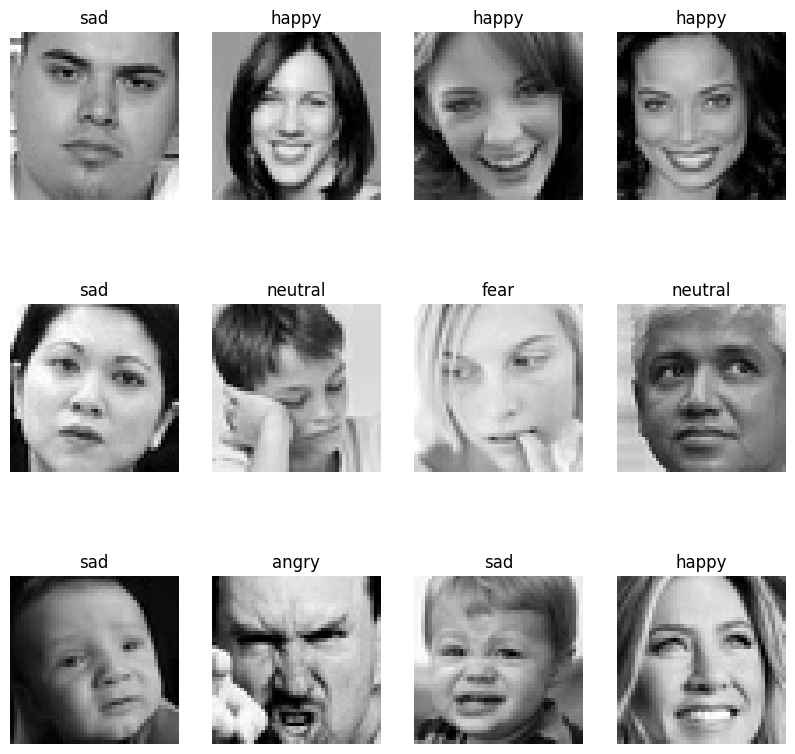

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

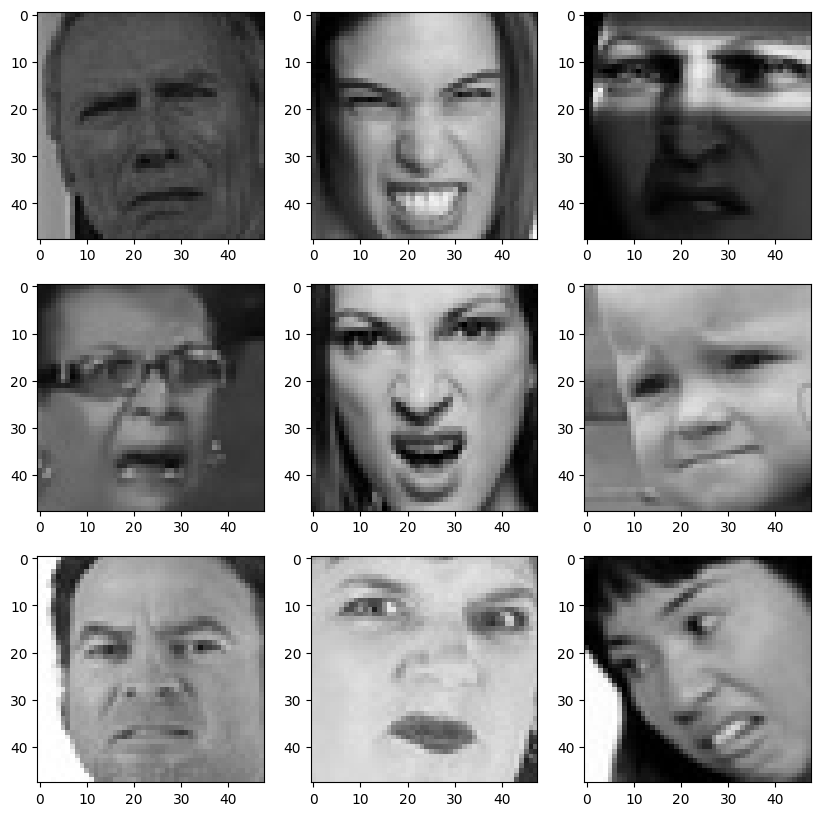

In [ ]:
expression = 'disgust'

plt.figure(figsize= (10,10))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(IMG_HEIGHT, IMG_WIDTH))
    plt.imshow(img)
plt.show()

In [ ]:
train_data_dir=folder_path+"train/"
validation_data_dir=folder_path+"validation/"

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255, # Normalize the pixel values to the range [0, 1]
    rotation_range=30, # Randomly rotate the images by up to 30 degrees
    shear_range=0.3, # Shear the image by up to 30%
    zoom_range=0.3, # Zoom in on the image by up to 30%
    horizontal_flip=True, # Randomly flip the images horizontally
    fill_mode='nearest' # Fill in any missing pixels after a transformation with the nearest pixel value
)

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255) # Normalize the pixel values to the range [0, 1]

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir, # Directory containing the training data
    color_mode='grayscale', # Convert images to grayscale
    target_size=(IMG_HEIGHT, IMG_WIDTH), # Resize images to the specified height and width
    batch_size=BATCH_SIZE, # Number of images to return in each batch
    class_mode='categorical', # Return one-hot encoded labels
    shuffle=True # Shuffle the order of the images
)

Found 28821 images belonging to 7 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir, # Directory containing the validation data
    color_mode='grayscale', # Convert images to grayscale
    target_size=(IMG_HEIGHT, IMG_WIDTH), # Resize images to the specified height and width
    batch_size=BATCH_SIZE, # Number of images to return in each batch
    class_mode='categorical', # Return one-hot encoded labels
    shuffle=True # Shuffle the order of the images
)

Found 7066 images belonging to 7 classes.


In [ ]:
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [ ]:
img, label = train_generator.__next__() # img: (32, 48, 48, 1) label: (32, 7)

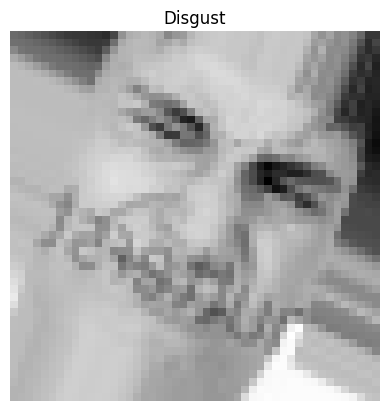

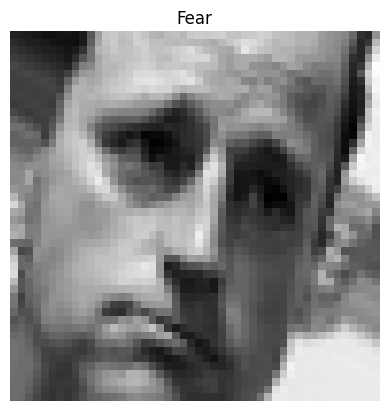

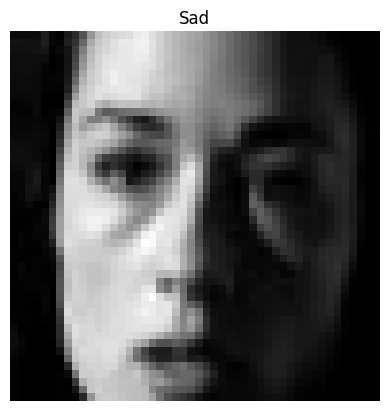

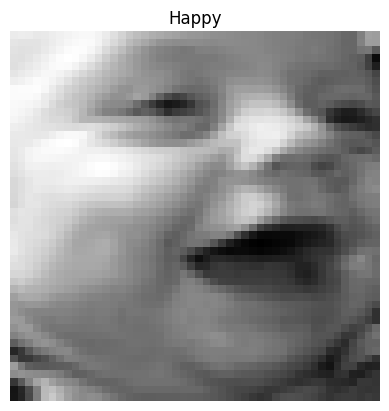

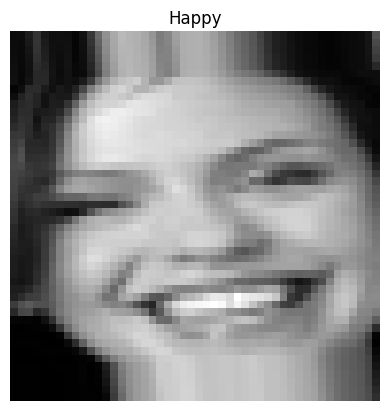

In [ ]:
# Plotting the first few images and their labels from the batch
for i in range(5):
    plt.imshow(img[i].reshape(48, 48), cmap='gray')
    plt.title(class_labels[np.argmax(label[i])])
    plt.axis('off')
    plt.show()

In [ ]:
train_path = folder_path+"train/"
test_path = folder_path+"validation/"

In [ ]:
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

In [ ]:
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

In [ ]:
from keras.optimizers import Adam,SGD,RMSprop

no_of_classes = 7

model = Sequential()

#1st CNN layer

# 64=>The number of filters (3, 3)=>The size of the filters  padding = 'same'=>output size=input size.
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1))) # 1 color channel (grayscale)
model.add(BatchNormalization()) # normalizes the inputs of the previous layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2))) # To decrease dimentions
model.add(Dropout(0.25)) # To prevent overfitting (Dropout Regularization)

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())  # multi-dimensional input into a 1D vector

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

opt = Adam(learning_rate=  0.0001)  # Adaptive Moment Estimation (Stochastic Gradient Descent with Momentum)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [ ]:
epochs=50

history = model.fit(train_generator,
                    steps_per_epoch=num_train_imgs // BATCH_SIZE,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=num_test_imgs // BATCH_SIZE,
                    )

Epoch 1/50
900/900 [==============================] - 45s 40ms/step - loss: 2.0107 - accuracy: 0.2210 - val_loss: 1.7529 - val_accuracy: 0.2803
Epoch 2/50
900/900 [==============================] - 35s 39ms/step - loss: 1.8846 - accuracy: 0.2449 - val_loss: 1.7082 - val_accuracy: 0.3158
Epoch 3/50
900/900 [==============================] - 33s 37ms/step - loss: 1.8287 - accuracy: 0.2725 - val_loss: 1.6760 - val_accuracy: 0.3493
Epoch 4/50
900/900 [==============================] - 35s 39ms/step - loss: 1.7684 - accuracy: 0.2961 - val_loss: 1.5824 - val_accuracy: 0.3862
Epoch 5/50
900/900 [==============================] - 33s 37ms/step - loss: 1.7142 - accuracy: 0.3190 - val_loss: 1.5706 - val_accuracy: 0.3868
Epoch 6/50
900/900 [==============================] - 32s 36ms/step - loss: 1.6582 - accuracy: 0.3463 - val_loss: 1.5012 - val_accuracy: 0.4124
Epoch 7/50
900/900 [==============================] - 33s 36ms/step - loss: 1.6089 - accuracy: 0.3711 - val_loss: 1.4431 - val_accuracy:

In [ ]:
model.save('Human_Emotion_Recog_Model_50epochs.h5')

In [ ]:
model.save('Human_Emotion_Recog_Model_50epochs.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


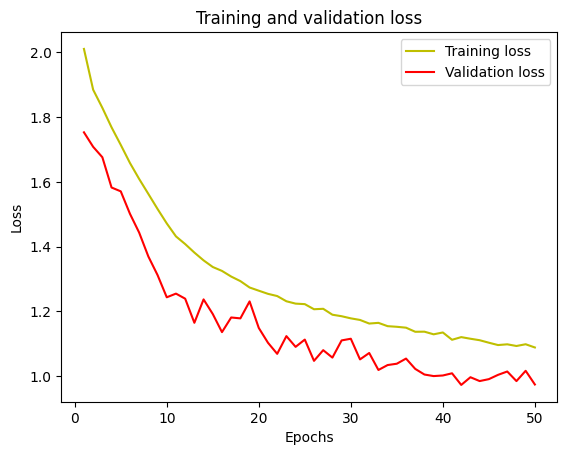

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

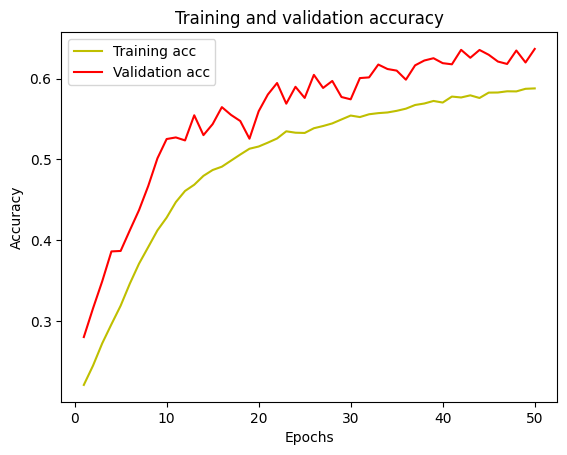

In [ ]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model

In [ ]:
#Test the model
my_model = load_model('Human_Emotion_Recog_Model_50epochs.keras', compile=False)

In [ ]:
#Generate a batch of images (32 images from the validation dataset)
test_img, test_lbl = validation_generator.__next__() #test imag :(32,48,48,1) tast lbl : (32,7)
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1) #do prediction of all
test_labels = np.argmax(test_lbl, axis=1)

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

1/1 [==============================] - 0s 300ms/step
Accuracy =  0.65625


In [ ]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

<Axes: >

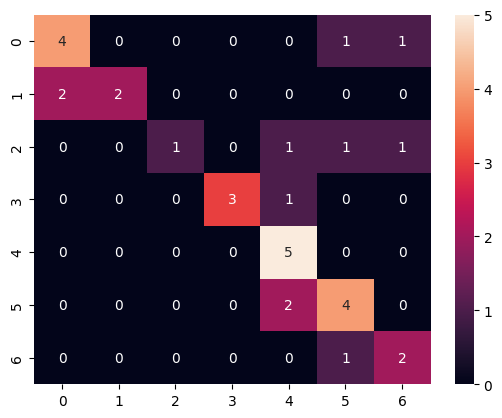

In [ ]:
cm = confusion_matrix(test_labels, predictions)
#print(cm)
import seaborn as sns
sns.heatmap(cm, annot=True)

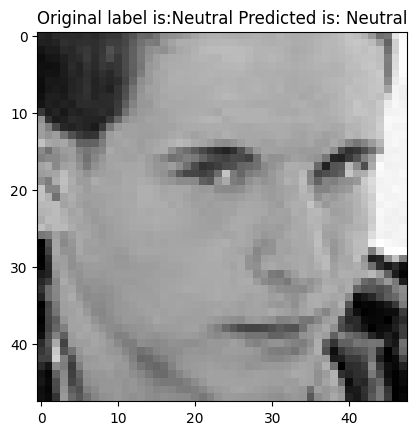

In [ ]:
import random
# class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()